<a href="https://colab.research.google.com/github/MarianaVilasBoas/Portfolio/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction

Vocês sabem o que é o termo _**Churn**_ representa e por que é tão discutido hoje em dias pelas empresas? 

_**Churn**_ representa a taxa de evasão dos clientes, isto é, percentual de usuários que deixam de usar os serviços da empresa para usufruir dos concorrentes. Esse tema revolucionou o modo que as empresas olham para os seus clientes e é sobre isso que vamos conversar.

<center><img alt="Churn Rate" width="55%" src="https://www.questionpro.com/blog/wp-content/uploads/2018/03/churn.png"></center>


Apesar dos esforços das companhias estarem sempre voltados para a conquista de novos clientes, devemos nos fazer as seguintes perguntas: 

_**Qual a vantagem de se conquistar um novo cliente se há a perda de um já existente?**_

_**Qual o custo da falta de conhecimento de um cliente recém prospectado? Como é o seu comportamento? Ele pagará os serviços em dia?**_


Para as empresas o processo de fidelizar um cliente é menos oneroso do que de se adquirir um novo (CAC). Por isso, as companhias estão cada vez mais focadas na manutenção e permananência de seus clientes, em aumentar o LTV (Life Time Value), isto é, receita total gerada pelo cliente enquanto permanecer utilizando os serviços.

A capacidade de prever quando um cliente deixará de usar os seus serviços se tornou um diferencial pois permite que empresa adote medidas preventivas antes que o cancelamento ocorra. Com isso em mente, de que forma as companhias têm investido em identificar se o cliente está insatisfeito?

Um método que muitas empresas adotam para realizar o gerenciamento dos seus usuários é o CRM (Customer Relationship Management). O CRM permite o aumento das interações com o consumidor e a conversão de informações em um relacionamento com os seus clientes. Esse método possui quatro principais estratégias:
* Identificar os clientes
* Diferenciar os clientes
* Interagir com os clientes
* Personalizar o relacionamento

Como podemos ver o _**Churn**_ está diretamente ligado com as estratégias do CRM. Esta ferramenta é amplamente utilizada para identificar perfis de clientes com alto potencial de atrito, segmentação de perfis e interação e personalização da experiência dos usuários. 


Dito isso, o nosso objetivo é desenvolver um modelo de Machine Learning capaz de identificar potenciais clientes com altas chances de cancelamento para que a empresa consiga tomar medidas preventivas para evitar a desistência. Desse modo é possível diminuir os custos com as conversões e a empresa pode se concentrar em atrair novos clientes visto que com um _overview_ do comportamento da sua base de clientes se torna mais fácil antever as suas necessidades.

## Aquisição dos Dados
O mercado de telecomunicações é marcado por uma intensa concorrência. Em um meio que se diferenciar dos concorrentes é uma tarefa complicada e a guerra de preços é abundante, a retenção de clientes é uma iniciativa um tanto quanto complicada porém, sobretudo, essencial.   

As empresas do segmento de telecomunicações são  diretamente impactadas pelo _**Churn**_  e usufruem do marketing de relacionamento na tentativa de reter seus clientes. E, por isso, vamos analisar uma base de dados disponibilizada na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#). Este _dataframe_ se trata de um problema típico de uma companhia de telecomunicações e pode ser acessado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

## Obtenção dos Dados

Inicialmente, importei o nosso _dataset_  para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot;

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

## Análise Exploratória

Inicialmente verifiquei as cinco primeiras entradas do _dataframe_:
* Se trata de um problema supervisionado de classificação, onde vamos prever se um cliente irá ou não cancelar os seviços contratados
* A variável 'customerID' não agrega nenhum conhecimento e pode ser retirada sem prejudicar a análise
* A maioria das variáveis são categóricas e terão que passar por um processo de decodificação
* A variável alvo corresponde à coluna 'Churn' que classifica o cliente em:
  * 0 - cliente continua utilizando os serviços
  * 1 - cliente cancelou os serviços

In [ ]:
# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Em seguida verifiquei o volume de dados do nosso _dataframe_ e o tipo das nossas variáveis. Como podemos ver a maioria das variáveis estão no formato de string e precisarão passar por um tratamento.

In [ ]:
#verificar volume de dados do dataframe
print("Entradas:\t",df.shape[0])
print("Variáveis\t",df.shape[1])

#verificar tipo das variáveis
df.dtypes

Entradas:	 7043
Variáveis	 21


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

A partir dessas informações montei um dicionário a fim de facilitar a análise do _dataset_.

######**Dicionário das variáveis**

* **`customerID`** - número de indentificação do cliente
* **`gender`** - gênero do cliente
* **`SeniorCitizen`** - classifica o cliente em idoso ou não 
    * 0 - cliente não é considerado idoso
    * 1 - cliente é idoso
* **`Partner`** - cliente possui um parceiro (sim ou não)
* **`Dependents`** - o cliente tem dependentes (sim ou não)
* **`tenure`** - tempo que o cliente permancece assinando o serviço
* **`PhoneService`** - o cliente assina o serviço de telefone (sim ou não)
* **`MultipleLines`** - o cliente possui múltiplas linhas (sim ou não)
* **`InternetService`** - tipo de internet contratada
* **`OnlineSecurity`** - o cliente assina segurança para a internet (sim ou não)
* **`OnlineBackup`** - o cliente assina serviço online de backup (sim ou não)
* **`DeviceProtection`** - cliente assina proteção para dispositivo internet (sim ou não)
* **`TechSupport`** - cliente assina suporte técnico (sim ou não)
* **`StreamingTV`** - cliente assina pacote de tv (sim ou não)
* **`StreamingMovies`** - cliente assina pacote de filmes (sim ou não)
* **`Contract`** - tipo de contrato
* **`PaperlessBilling`** - cliente recebe a conta online (sim ou não)
* **`PaymentMethod`** - tipo de pagamento
* **`MonthlyCharges`** - custo por mês
* **`TotalCharges`** - custo total
* **`Churn`** - cliente deixou de usar os serviços (sim ou não)

### Valores Ausentes
Verifiquei, então, o percentual dos valores nulos para entender se eram significativos em relação ao total de entradas. Como há variáveis do tipo string não conseguimos saber se esses percentuais são realistas, os dados terão que passar por um processo de limpeza para conseguirmos verificar essa informação com mais precisão.

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)[:5]

Churn             0.0
OnlineSecurity    0.0
gender            0.0
SeniorCitizen     0.0
Partner           0.0
dtype: float64

#### Preparação de `TotalCharges`
Antes de começarmos a análise é importante ressaltar que a variável `TotalCharges` consta como string, quando deveria estar no formato float, como ocorre em `MonthlyCharges`. É preciso, portanto, convertê-la antes de prosseguirmos.

In [ ]:
#criar cópia do dataframe
df_clean=df.copy()

#converter string em float
def converter_string_float(value):
  try:
    return float(value)
  except ValueError:
      return np.nan

df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_string_float)

In [ ]:
#conferir tipo variável
df_clean.TotalCharges.dtypes

dtype('float64')

Agora que a variável está no formato correto podemos conferir o número de valores ausentes.

É possível visualizarmos que a variável `TotalCharges` possui valores 11 ausentes e decidi preenchê-los com a mediana.

In [ ]:
#verificar valores nulos
df_clean.isnull().sum().sort_values(ascending=False)[:5]

TotalCharges      11
Churn              0
OnlineSecurity     0
gender             0
SeniorCitizen      0
dtype: int64

In [ ]:
#substituir valores nulos pela mediana
TC_median=df_clean.TotalCharges.median()
df_clean.fillna(TC_median,inplace=True)

### Distribuição das Variáveis
Apesar da maioria das variáveis serem categóricas pela distribuição estatística já é possível verificar que não há indícios de _outliers_.

In [ ]:
#plotar distriubuição estatística
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Analisei, então, o _boxplot_ das variáveis `MonthlyCharges` e `TotalCharges` para confirmarmos a ausência de _outliers_. E, como é possível visualizar, não há nenhum dado fora dos limites superior e inferior.

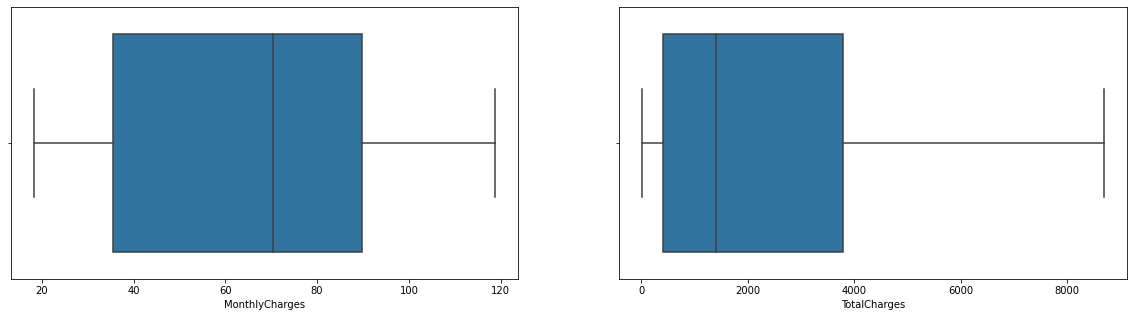

In [ ]:
#plotar boxplot das variáveis em análise
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))

sns.boxplot(x=df_clean.MonthlyCharges,ax=ax[0])
sns.boxplot(x=df_clean.TotalCharges,ax=ax[1])
fig.show()

Em seguida, analisei a distribuição da variável `Tenure` que corresponde ao tempo que o cliente permanece assinando um serviço. Como não é informada a escala de tempo dessa medida, assumi que é avaliado em meses.

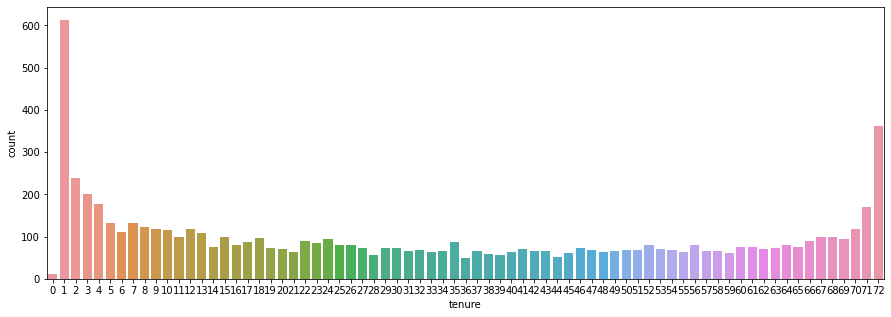

In [ ]:
#analisar distribuição tenure
fig,ax=plt.subplots(figsize=(15,5))

sns.countplot(x=df_clean['tenure'])

Quando se tratam de variáveis categóricas é uma boa prática verificar as entradas únicas no intuito de validar se há mais de um _label_ indicando a mesma coisa. Porém, antes disso, como vimos a variável `customerID`, referente ao número de identificação do cliente, não agrega na nossa análise. Portanto, vou retirá-la pois pode atrapalhar a nossa verificação de valores únicos.

In [ ]:
#retirar a variável customerId
df_clean.drop('customerID',axis=1,inplace=True)

Com a base de dados 'limpa' verifiquei as entradas únicas do nosso _dataset_. Como podemos verificar abaixo há ocorrência de entradas de tipo de pagamento, periodicidade, de gênero e tipo de serviço contratado.

Para fins de análise considerei que:
* Entradas como `No`, `No internet service` e `No phone service` representam a mesma coisa, portanto, podemos substituí-las apenas por `No` conforme demais entradas.
* Vamos verificar o balanceamento de `Female` e `Male` para verificar se há algum tipo de viés nos nossos dados que possam enviesar, de algum modo, a nossa análise.
* As demais entradas únicas não prejudicam a nossa análise e não precisamos alterá-las.

In [ ]:
# verificar valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Em seguida, verifiquei o balanceamento dos dados segundo o gênero e, como podemos observar abaixo eles já se encontram balanceados.

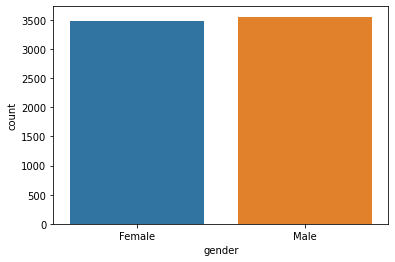

In [ ]:
sns.countplot(x=df_clean.gender);

### Balanceamento dos dados
Depois, analisei o balanceamento dos dados e verifiquei que **77%** da base de dados é representada por **clientes normais**, o que já era esperado. Os **clientes desistentes**, por sua vez, representam apenas **22%**.

Para tornar a discrepância mais visual plotei um gráfico de Distribuição do Churn para evidenciar a dominância dos clientes considerados normais representadas pela barra azul sobre os clientes desistentes, barra laranja. Como os dados estão desbalanceados será necessária uma etapa de balanceamento de modo a otimizar o desempenho do modelo.



Clientes normais:	 73.4630129206304
Clientes desistentes:	 26.536987079369588




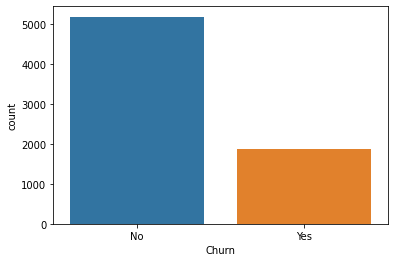

In [ ]:
#verificar balanceamento dos dados
sns.countplot(x=df_clean.Churn)

#verificar percentual de churn corresponde a cada classe
print('\n\nClientes normais:\t',df_clean[df_clean.Churn=='No'].shape[0]/df_clean.shape[0] * 100)
print('Clientes desistentes:\t',df_clean[df_clean.Churn=='Yes'].shape[0]/df_clean.shape[0] * 100)
print('\n')


Resumindo, algumas conclusões que foram extraídas dessa etapa exploratória foram:

* O dataset está muito desbalanceado, uma vez que os clientes desistentes representam apenas 22% das entradas
* Pela distribuição estatística e boxplot foi possível confirmar que não há a presença de outliers nas variáveis `MonthlyCharges` e `TotalCharges`
* Entradas como `No`, `No internet service` e `No phone service` representam a mesma coisa, portanto, podemos substituí-las apenas por `No` conforme demais entradas

## Preparação dos Dados

A partir das conclusões da etapa exploratória, resolvi observar os seguintes tópicos para preparar os dados:

* Substituir as entradas `No internet service` e `No phone service` por `No`
* Decodificar as variáveis binárias e categóricas

Para dar início à preparação dos dados, comecei substituindo as entradas `No internet service` e `No phone service` por `No`

In [ ]:
#substituir variáveis destacadas por label 'No'
df_clean.MultipleLines.replace('No phone service','No',inplace=True)
df_clean.OnlineSecurity.replace('No internet service','No',inplace=True)
df_clean.OnlineBackup.replace('No internet service','No',inplace=True)
df_clean.DeviceProtection.replace('No internet service','No',inplace=True)
df_clean.TechSupport.replace('No internet service','No',inplace=True)
df_clean.StreamingTV.replace('No internet service','No',inplace=True)
df_clean.StreamingMovies.replace('No internet service','No',inplace=True)

#conferir cinco primeiras entradas
df_clean[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Após isso, para conseguir decodificar as variáveis categóricas separei as _features_ em três grupos:
  * Variáveis binárias
  * Variáveis numéricas
  * Variáveis categóricas

De acordo com as classificações das variáveis, apliquei os decodificadores aos grupos das variáveis binárias e categóricas.

In [ ]:
#pré processar as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

Para as variáveis binárias utilizei o método do LabelEncoder

In [ ]:
#importar pacotes necessários
from sklearn.preprocessing import LabelEncoder

#fazer uma cópia do dataset
df_proc=df_clean.copy()

#decodificar variáveis binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

Para as variáveis categóricas que possuem múltiplas classes utilizei o método Get Dummies que elimina a hierarquia da ordem, que no caso do nosso _dataset_ não representa uma escala de importância.

In [ ]:
#decodificar variáveis categóricas
df_proc=pd.get_dummies(df_proc,columns=cat_var)

df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


## Modelo de Machine Learning

Após a etapa de preparação dos dados, devemos nos atentar aos seguintes tópicos para a construção do nosso Modelo de Machine Learning:
* dividir os dados entre treino e teste
* definir melhor métrica para avaliar modelo
* cross validation - avaliar modelo com melhor desempenho de acordo com métrica escolhida
* padronização dos dados
* balanceamento dos dados
* grid search - identificar os melhores parâmetros para o modelo ML

In [ ]:
#separar as variáveis X e y
X=df_proc.drop('Churn',axis=1)
y=df_proc.Churn

#dividir dados entre treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,shuffle=True)

Agora com os dados separados entre treino e teste, devemos escolher qual será a melhor métrica para avaliarmos nosso modelo.

* Analisando o contexto do nosso problema, o pior erro seria não identificar um cliente 'desistente'. Portanto, iremos utilizar a métrica do Recall que avalia o percentual de acerto que o modelo identificou que um cliente desistente iria de fato cancelar os serviços.
* Neste projeto a precisão não é tão relevante pois caso o modelo identifique como desistente um cliente 'normal', a operadora provavelmente irá mandar apenas um e-mail com promoções ou entrar em contato oferecendo melhores condições.

Com a métrica definida iremos utilizar o Cross Validation para estimar o erro do modelo.

In [ ]:
#definir função de cross validation
def val_model(X, y, clf, quite=False):
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

Para a baseline utilizei o modelo de RandomForestClassifier e obtivemos um score de 0.48 de recall.

In [ ]:
# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.48 (+/- 0.02)


Antes de identificarmos o melhor modelo a ser utilizado na nossa análise, devemos balancear e padronizar os dados para evitar análises enviesadas. Para balancear os dados utilizei o método de RandomUnderSampler que retira amostras aleatórias da classe majoritária (clientes normais) sem prejudicar a classe minoritária (clientes desistentes).

In [ ]:
# padronizar os  dados
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

#balancear os dados
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Agora com os dados tratados devemos analisar os desempenhos dos modelos para identificar qual iremos desenvolver. Para isso, utilizei a validação cruzada com o intuito de analisar qual modelo possui a melhor performance baseado na métrica de Recall.

In [ ]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []

#avaliar o desempenho do modelo

for clf in (rf,dt,sgdc,svc,lr,xgb,lgbm):
  model.append(clf.__class__.__name__)
  recall.append(val_model(X_train_rus,y_train_rus,clf,quite=True))

pd.DataFrame(data=recall,index=model,columns=['Recall'])

,Recall
RandomForestClassifier,0.760353
DecisionTreeClassifier,0.691164
SGDClassifier,0.685391
SVC,0.796734
LogisticRegression,0.787453
XGBClassifier,0.800300
LGBMClassifier,0.770341


Com base na tabela acima podemos perceber que os modelos de Regressão Logística e XGBClassifier possuem valores de Recall muito próximos. Entretanto, como o modelo XGBClassifier me dá a liberdade de manipular mais hiperparâmetros e, portanto, melhorar a qualidade da solução optei por utilizar esse modelo.

### Otimização dos hiperparâmetros

Para identificar os melhores hiperparâmetros do modelo utilizei o GridSearch e defini uma taxa de aprendizado de 0.1 para desacelerar a taxa de aprendizado do algoritmo e dessa forma evitar um overfit com os dados de treino.

*   Para diminuir o tempo de reprocessamento do GridSearch realizei um ajuste fino dos hiperparâmetros individualmente em rodadas, sempre definindo o modelo da rodada seguinte com base nos hiperparâmetros ótimos da anterior. 
*   Para definir os intervalos que os hiperparâmetros foram testados consultei os valores default na documentação da biblioteca do XGBoost e fui realizando ajustes finos.

**1ª rodada ✔**
*   O primeiro hiperparâmetro que foi testado foi o `n_estimators` e obtivemos que o seu melhor resultado é 8 e o modelo conseguiu aumentar o seu o Recall para aproximadamente 0.86.



In [ ]:
xgb = XGBClassifier(learning_rate=0.1)

#importar pacotes
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':range(0,10,1),
    }

#identificar melhores parâmetros
grid_search=GridSearchCV(xgb,param_grid,scoring='recall')
grid_result=grid_search.fit(X_train_rus,y_train_rus)

#resultados
print('Melhor {} para {}'.format(grid_result.best_score_,grid_result.best_params_))

Melhor 0.7974504321301474 para {'n_estimators': 6}


**2ª rodada ✔**

*   Em seguida testei os hiperparâmetros `max_depth` e `min_child_weight` e obtive para amabos valores ótimos iguais a 1 e o Recall aumentou para aproximadamente 0.89

In [ ]:
#definir modelo com hiperparâmetros da rodada anterior
xgb = XGBClassifier(learning_rate=0.1,n_estimators=8)

param_grid = {
    'max_depth':range(1,10,1),
    'min_child_weight':range(1,10,1)
    }

#identificar melhores parâmetros
grid_search=GridSearchCV(xgb,param_grid,scoring='recall')
grid_result=grid_search.fit(X_train_rus,y_train_rus)

#resultados
print('Melhor {} para {}'.format(grid_result.best_score_,grid_result.best_params_))

Melhor 0.8794407727503813 para {'max_depth': 1, 'min_child_weight': 1}


**3ª rodada ✔**

*   Continuando o processo, testei o gamma e o melhor resultado obtido foi 1 (default) e o valor do Recall quase não alterou.

In [ ]:
#definir modelo com hiperparâmetros da rodada anterior
xgb = XGBClassifier(learning_rate=0.1,n_estimators=8,max_depth=1,min_child_weight=1)

param_grid = {
    'gamma':range(0,5,1),
    }

#identificar melhores parâmetros
grid_search=GridSearchCV(xgb,param_grid,scoring='recall')
grid_result=grid_search.fit(X_train_rus,y_train_rus)

#resultados
print('Melhor {} para {}'.format(grid_result.best_score_,grid_result.best_params_))

Melhor 0.8794407727503813 para {'gamma': 0}


**4ª rodada ✔**

*   Por fim, testei a `learning_rate` e obtive o melhor resultado como 0.001 e o valor do Recall permaneceu inalterado dando fim ao nosso processo de tunning dos hiperparâmetros

In [ ]:
#definir modelo com hiperparâmetros da rodada anterior
xgb = XGBClassifier(learning_rate=0.1,n_estimators=8,max_depth=1,min_child_weight=1,gamma=0)

param_grid = {
    'learning_rate':[0.001, 0.01, 0.1, 1]
    }

#identificar melhores parâmetros
grid_search=GridSearchCV(xgb,param_grid,scoring='recall')
grid_result=grid_search.fit(X_train_rus,y_train_rus)

#resultados
print('Melhor {} para {}'.format(grid_result.best_score_,grid_result.best_params_))

Melhor 0.8794407727503813 para {'learning_rate': 0.001}


Podemos extrair desse passo a passo que o ajuste fino dos hiperparâmetros conseguiu elevar o valor do Recall que antes era de 0.81 para 0.89, melhoria considerável que irá otimizar o resultado da nossa análise.


Com o modelo definido e os hiperparâmetros ajustados, agora devemos rodar o modelo e realizar as previsões.

In [ ]:
#modelo com hiperparâmetros ajustados
xgb = XGBClassifier(learning_rate=0.001,n_estimators=8,max_depth=1,min_child_weight=1,gamma=0)

#treinar o modelo
xgb.fit(X_train_rus,y_train_rus)

#fazer previsões
X_test=scaler.transform(X_test)
y_prev=xgb.predict(X_test)

In [ ]:
#relatório de classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prev))

              precision    recall  f1-score   support

           0       0.94      0.55      0.70      1294
           1       0.42      0.90      0.58       467

    accuracy                           0.65      1761
   macro avg       0.68      0.73      0.64      1761
weighted avg       0.80      0.65      0.67      1761



In [ ]:
# imprimir a área sob a curva
from sklearn.metrics import roc_auc_score
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

AUC: 0.5039



		 Relatório de Classificação

               precision    recall  f1-score   support

           0       0.94      0.55      0.70      1294
           1       0.42      0.90      0.58       467

    accuracy                           0.65      1761
   macro avg       0.68      0.73      0.64      1761
weighted avg       0.80      0.65      0.67      1761


Recall:	 0.9036402569593148

Área sob a curva:	 0.7288680419263345


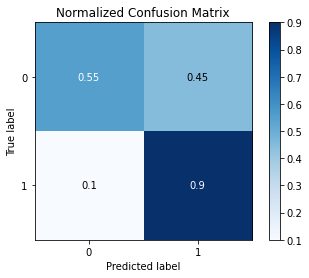

In [ ]:
#plotar matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test,y_prev,normalize=True)

#relatório de classificação
from sklearn.metrics import classification_report
print('\t\t Relatório de Classificação\n\n',classification_report(y_test,y_prev))

#calcular acurácia do modelo
from sklearn.metrics import accuracy_score
print('\nRecall:\t',recall_score(y_test,y_prev))

#calcular área sob a curva
from sklearn.metrics import roc_auc_score
print('\nÁrea sob a curva:\t',roc_auc_score(y_test,y_prev))

* Com o processo de otimização dos hiperparâmetros conseguimos que o modelo mantivesse o Recall estimado anteriormente. Isto é, em 90% dos casos ele consegue identificar um cliente desistente que de fato é desistente e a empresa consegue tomar medidas preventivas antes que o cliente desista de usar os serviços, importante em um mercado tão concorrido e com pouca diferenciação.
* Nos casos que o modelo identifica um cliente usual como desistente, em torno de 45% dos cliente normais, não há danos no relacionamento com o cliente pois  a operadora provavelmente irá entrar em contato oferecendo melhores condições.